In [1]:
import csv
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [10]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
        
        csv_file = np.genfromtxt(filename,delimiter=',')
        labels = np.asarray(csv_file[1:,:1]).astype('float')
        labels = np.squeeze(labels)
        images = np.asarray(csv_file[1:,1:]).astype('float')
        images = np.array([np.reshape(i, (28, 28)) for i in images])
        #images = np.array([i.flatten() for i in images])
       
      # Your code ends here
    return images, labels


training_images, training_labels = get_data('./tmp/sign-language-mnist/sign_mnist_train.csv')
testing_images, testing_labels = get_data('./tmp/sign-language-mnist/sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [13]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1.0/255. )

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [53]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')]
    )

# Compile Model. 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size = 32), 
    steps_per_epoch=len(training_images) / 32,
    epochs=50, 
    validation_data = validation_datagen.flow(testing_images, testing_labels, batch_size = 32),
    validation_steps=len(testing_images) / 32)
model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 857.96875 steps, validate for 224.125 steps
Epoch 1/50
858/857 [==============================] - 5s 6ms/step - loss: 2.6519 - accuracy: 0.1873 - val_loss: 1.8334 - val_accuracy: 0.3666
Epoch 2/50
858/857 [==============================] - 5s 6ms/step - loss: 1.7900 - accuracy: 0.4236 - val_loss: 1.0794 - val_accuracy: 0.6383
Epoch 3/50
858/857 [==============================] - 5s 6ms/step - loss: 1.3597 - accuracy: 0.5592 - val_loss: 0.8237 - val_accuracy: 0.7154
Epoch 4/50
858/857 [==============================] - 5s 6ms/step - loss: 1.0963 - accuracy: 0.6384 - val_loss: 0.6421 - val_accuracy: 0.7817
Epoch 5/50
858/857 [==============================] - 5s 6ms/step - loss: 0.9323 - accuracy: 0.6904 - val_loss: 0.5496 - val_accuracy: 0.8157
Epoch 6/50
858/857 [==============================] - 5s 6ms/step - loss: 0.8145 - accuracy: 0.7288 - val_loss: 0.4459 - val_accuracy: 0.8565
Epoch 7/50
858/857 [========================

[6.92426086682151, 0.56609035]

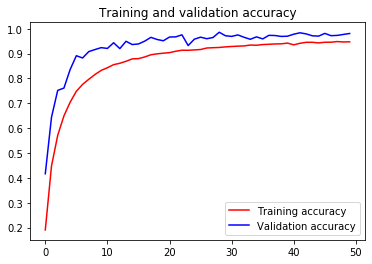

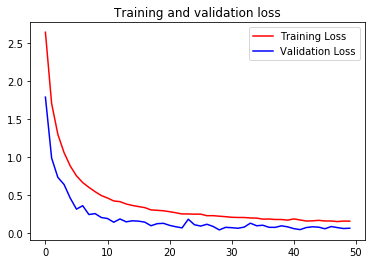

In [34]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
import numpy as np
from keras.preprocessing import image
import os

files_dir = os.path.join('./tmp/sign-language-mnist/wiola/')
files_dir_items = os.listdir(files_dir)

for fn in files_dir_items:
 
  # predicting images
  path = os.path.join(files_dir,fn)
  img = image.load_img(path, color_mode='grayscale', target_size=(28, 28))
    
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

IMG_20200209_210045.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
IMG_20200209_210050.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
IMG_20200209_210059.jpg
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
IMG_20200209_210106.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
IMG_20200209_210111.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


In [64]:
uniqueValues, indicesList = np.unique(training_labels, return_index=True)

list_of_letters = []

# Zip both the arrays
listOfUniqueValues = zip(uniqueValues, indicesList)
print('Unique values and their first index :')
# Iterate over the zip object
for elem in listOfUniqueValues:
    list_of_letters.append(elem[1])
    print(elem[0], ' at Index : ', elem[1])

Unique values and their first index :
0.0  at Index :  46
1.0  at Index :  29
2.0  at Index :  2
3.0  at Index :  0
4.0  at Index :  44
5.0  at Index :  48
6.0  at Index :  1
7.0  at Index :  49
8.0  at Index :  6
10.0  at Index :  11
11.0  at Index :  40
12.0  at Index :  31
13.0  at Index :  4
14.0  at Index :  61
15.0  at Index :  41
16.0  at Index :  5
17.0  at Index :  16
18.0  at Index :  10
19.0  at Index :  19
20.0  at Index :  14
21.0  at Index :  21
22.0  at Index :  7
23.0  at Index :  23
24.0  at Index :  26
[46, 29, 2, 0, 44, 48, 1, 49, 6, 11, 40, 31, 4, 61, 41, 5, 16, 10, 19, 14, 21, 7, 23, 26]


In [88]:
def display_images(training_images, training_labels):
    x, y = training_images, training_labels
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
    for i, ax in enumerate(axes.flat):
        ax.imshow(x[i].reshape(28, 28), cmap = 'binary')
        ax.set_xlabel(chr(y[i] + 65))
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()